Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [118]:
bike_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/toronto_bike_df.csv')
yelp_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/yelp_df.csv')
fsquare_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/fsquare_df.csv')

In [119]:
bike_df
bike_df['coordinates'] = bike_df['lat'].astype(str) + ',' + bike_df['lon'].astype(str)

In [120]:
rating_df = yelp_df.merge(fsquare_df, how = 'outer')
rating_df

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res
0,Maha's,226 Greenwood Avenue,4.0,572.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
1,The Burger's Priest,1636 Queen Street E,3.5,503.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
2,Chino Locos Original,4 Greenwood Avenue,4.0,190.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
3,Lahore Tikka House,1365 Gerrard Street E,3.5,542.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
4,Gio Rana's Really Really Nice Restaurant,1220 Queen Street East,4.0,228.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56410,Popeye's Louisiana Kitchen,645 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.5,17.0,11.0,50.0
56411,Pita Land,102 Gerrard St E,NaN,NaN,NaN,"43.666874,-79.381155",6.5,9.0,15.0,50.0
56412,Manulife Centre,55 Bloor St W,NaN,NaN,NaN,"43.666874,-79.381155",6.3,73.0,101.0,50.0
56413,Boston Pizza,401 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,11.0,12.0,50.0


In [121]:
complete_df = rating_df.merge(bike_df, how='outer')
complete_df.drop(['lat','lon'], axis=1, inplace=True)
complete_df

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res,num_of_bikes
0,Maha's,226 Greenwood Avenue,4.0,572.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
1,The Burger's Priest,1636 Queen Street E,3.5,503.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
2,Chino Locos Original,4 Greenwood Avenue,4.0,190.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
3,Lahore Tikka House,1365 Gerrard Street E,3.5,542.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
4,Gio Rana's Really Really Nice Restaurant,1220 Queen Street East,4.0,228.0,50.0,"43.665269,-79.319796",NaN,NaN,NaN,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...
56411,Manulife Centre,55 Bloor St W,NaN,NaN,NaN,"43.666874,-79.381155",6.3,73.0,101.0,50.0,12
56412,Boston Pizza,401 Yonge St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,11.0,12.0,50.0,12
56413,Tim Hortons,581 Parliament St,NaN,NaN,NaN,"43.666874,-79.381155",6.3,2.0,1.0,50.0,12
56414,Subway,2460 Brock Rd N,NaN,NaN,NaN,"43.788319,-79.123505",NaN,0.0,0.0,1.0,23


In [152]:
complete_df[(complete_df['coordinates'] == '43.5961692,-79.5160575') & complete_df['yelp_num_res'].notna()]

,name,address,yelp_rating,yelp_total_ratings,yelp_num_res,coordinates,rating,total_photos,total_ratings,num_of_res,num_of_bikes
34537,DeCourses Café,3232 Lake Shore Blvd W,4.5,31.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34538,Kitchen On Sixth,2976 Lake Shore Boulevard W,4.5,47.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34539,Cellar Door,3003 Lake Shore Boulevard W,4.0,63.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34540,Tasty Korea,3323 Lake Shore Boulevard W,5.0,13.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34541,The Sydney Grind,2883 Lake Shore Blvd W,4.5,33.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34542,Simon Sushi,3399 Lake Shore Boulvard W,4.0,34.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34543,Black Goat Cafe,3261 Lake Shore Boulevard W,4.0,26.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34544,Kibo Sushi House,2945 Lake Shore Boulevard,4.0,31.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34545,Bombay On the Lake,3007 Lake Shore Boulevard W,3.5,45.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27
34546,Ghazale,3180 Lake Shore Boulevard W,4.0,22.0,42.0,"43.5961692,-79.5160575",NaN,NaN,NaN,NaN,27


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [151]:
bikes_per_location = complete_df.groupby('coordinates').agg({'num_of_bikes': np.average, 
                                                            'name': np.size,
                                                            'yelp_total_ratings': np.count_nonzero, 
                                                            'total_ratings': np.count_nonzero,
                                                            'yelp_num_res': np.nanmean, 
                                                            'num_of_res': np.nanmean})
bikes_per_location

,num_of_bikes,name,yelp_total_ratings,total_ratings,yelp_num_res,num_of_res
coordinates,,,,,,
"43.5880774,-79.5432067",22.0,35,35,23,15.0,20.0
"43.591561,-79.545827",33.0,50,50,26,18.0,33.0
"43.5927419,-79.54033009999999",18.0,63,63,35,27.0,40.0
"43.5961692,-79.5160575",27.0,78,78,50,42.0,37.0
"43.597082,-79.522768",19.0,69,69,42,35.0,37.0
...,...,...,...,...,...,...
"43.779353,-79.193023",23.0,43,43,27,23.0,20.0
"43.77953,-79.45233",15.0,13,13,9,6.0,7.0
"43.7805505,-79.1301203",25.0,10,10,7,5.0,5.0


<AxesSubplot: xlabel='name', ylabel='num_of_bikes'>

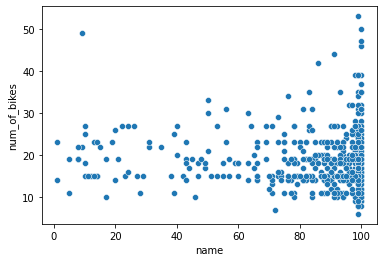

In [131]:
x = bikes_per_location['name']
y = bikes_per_location['num_of_bikes']
sns.scatterplot(x=x,y=y)
##Look for any correlation with the number of restaurants

<AxesSubplot: xlabel='yelp_total_ratings', ylabel='num_of_bikes'>

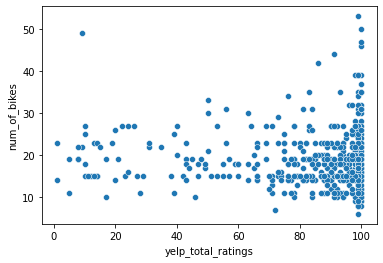

In [141]:
x = bikes_per_location['yelp_total_ratings']
y = bikes_per_location['num_of_bikes']
sns.scatterplot(x=x,y=y)
##Look for any correlation with the total rating from yelp

<AxesSubplot: xlabel='total_ratings', ylabel='num_of_bikes'>

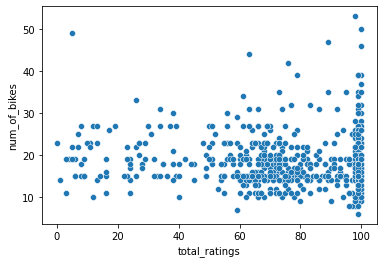

In [142]:
x = bikes_per_location['total_ratings']
y = bikes_per_location['num_of_bikes']
sns.scatterplot(x=x,y=y)
##Look for any correlation with the total rating from foursquare

<AxesSubplot: xlabel='yelp_num_res', ylabel='num_of_bikes'>

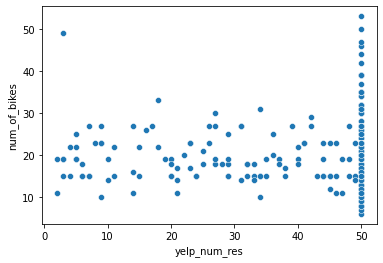

In [154]:
x = bikes_per_location['yelp_num_res']
y = bikes_per_location['num_of_bikes']
sns.scatterplot(x=x,y=y)
##Look for any correlation with the number of restaurants from yelp

<AxesSubplot: xlabel='num_of_res', ylabel='num_of_bikes'>

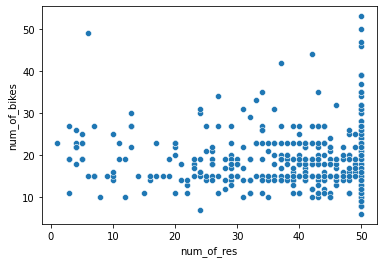

In [156]:
x = bikes_per_location['num_of_res']
y = bikes_per_location['num_of_bikes']
sns.scatterplot(x=x,y=y)
##Look for any correlation with the number of restaurants from foursquare

<AxesSubplot: xlabel='num_of_bikes', ylabel='Count'>

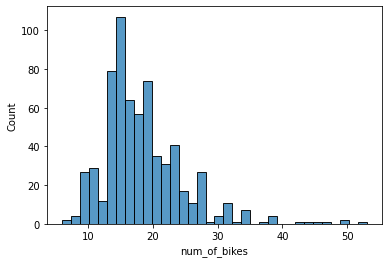

In [112]:
sns.histplot(y)

C:\Users\John\AppData\Local\Temp\ipykernel_14184\4205817679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(complete_df.corr())


<AxesSubplot: >

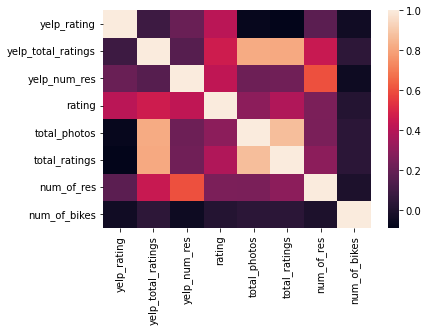

In [122]:
sns.heatmap(complete_df.corr())

<AxesSubplot: >

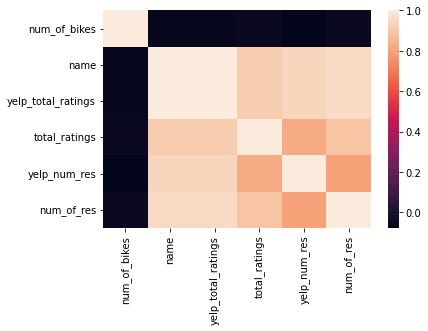

In [157]:
sns.heatmap(bikes_per_location.corr())

From these visualizations, the number of bikes did not have any correlation with the amount of restaurants or ratings. This may be due to the fact that a lot of the information had a limit of 50 restaurants which can be seen in the scatterplots above. There is a sweet spot for the number of bikes at each location which seems to be around 15. There are some potential outliers as can be seen in the histoplot of number of bikes stationed at each location. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.